<a href="https://colab.research.google.com/github/jiin124/MachineLearning/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
fish=pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


어떤 종류의 생선이 있는지 species 열에서 고유한 값 추출해보기

In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용한다. 

In [7]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [8]:
fish_target=fish['Species'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

### 최근접 이웃 분류기의 확률 예측

KNeighbors 클래스 객체를 만들고 훈련세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인해보자 
최근 접 이웃개수를 3으로 정한다

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


아까 species 에서 생선이 7마리 였다. 그래서 훈련세트와 테스트 세트의 타깃 데이터에도 7개의 생선종류가 들어가있다. 
타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 한다. 

이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 바꾸어 타깃 데이터를 만들었다. 다중 분류에서도 타깃값을 숫자로 바꾸어 입력 할 수 있지만 사이킷런에서는 편리하게 문자열로 된 타깃값을 그대로 사용할 수 있다. 

하지만 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진자. 

In [16]:
print(kn.classes_)#정렬된 타깃값은 classes_속성에 저장되어있다

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [17]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [18]:
import numpy as np
proba=kn.predict_proba(test_scaled[:5])#클래스별 확률 값을 반환한다. 
print(np.round(proba,decimals=4))#소수점 네번 쨰 자리까지 표기 다섯번째 자리에서 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


이 행렬에서 첫번째 열에 있는 것은 bream에 대한 확률, 두번째 열에 있는 것은 parkki에 대한 확률

4번째 샘플을 보면
[0.     0.     0.6667 0.     0.3333 0.     0.    ]
이다

In [19]:
distances,indexes=kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


다섯번재 클래스인 Roach가 1개이고, perch가 2개이다. 다섯번째 클래스에 대한 확률은 1/3==0.3333이고 2/3==0.6667 이다. 

 [0.     0.     0.6667 0.     0.3333 0.     0.    ] 을 보면 정확하다!!

 하지만 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3,1/3,2/3,3/3 이 전부이다.

## 로지스틱 회귀

선형회귀와 동일하게 선형 방정식을 학습한다.
z=a * (weight) + b * (length)+ c * (diagonal) +d * (height)+e * (width) +f

여기서 a,b,c,d,e는 가중치 혹은 계수이다. 특성은 늘어났지만 다중회귀를 위한 선형방적식과 같다. 

하지만 확률이 되려면 0~1사이 값이 되어야 한다. z가 아주 큰 음수일 때 0이 되고, z가 큰 양수일 때 1이 되도록 바꾸는 방법은 **시그모이드 함수(또는 로지스틱 함수)를 사용하면 된다**

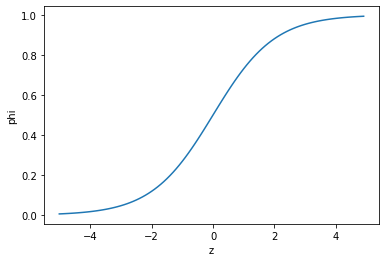

In [20]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)#-5와 5 사이에 0.1 간격ㅇ로 배열 z를 만든 다음 z ㅜ이치마다 시그모이드 함수를 계산한다. 
phi=1/(1+np.exp(-z))#지수 함수 계산은 np.exp() 함수를 이용한다. 
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열은 true false 값을 전달해 행을 선택 할 수 있다. 이를 불리언 인덱싱이라고 한다. 

In [22]:
char_arr=np.array(['A','B','C','D','E'])#A와 c만 골라내는 방법
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [23]:
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]#도미와 빙어의 행만 골라내기

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [26]:
print(lr.predict_proba(train_bream_smelt[:5]))#예측 확률, 첫번째 열이 음성 클래스 0 에 대한 확률이고 두번재 열이 양성 클래스 1에 대한 확률이다. 

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [27]:
print(lr.classes_)#빙어smelt가 양성클래스 이다. 

['Bream' 'Smelt']


In [28]:
print(lr.coef_,lr.intercept_)#로지스틱 회귀가 학습한 계수

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [29]:
decisions=lr.decision_function(train_bream_smelt[:5])#z값을 계산, LogisticRegression 클래스의 decision_function() 메서드로 z값 출력 가능
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [31]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값을 보면 predict() 메서드 출력의 두번째 열의 값과 동일하다 즉, decision_function() 메서드는 양성 클래스에 대한 z값을 반환한다. 

이진 분류를 위해 2개의 생선 샘플을 골란ㅆ고 이를 사용해 로지스틱 회귀 모델을 훈련했다. 
이진분류일 경우** predict_proba() **메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다. 또 **decision_function() **메서드는 양성 클래스에 대한 z값을 계산한다. 또 coef_ 속성과 intercept 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어가 있다. 